#  Lorenz System

[Wikipedia Article on Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system)

#  Describe Problem

$$\begin{align}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align}$$

The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above.

In particular, the equations describe the rate of change of three quantities with respect to time



$x$ : The intensity of the convective motion

$y$ : The temperature difference between the ascending and descending currents

$z$ : The distortion of the vertical temperature profile from linearity



$\sigma$ : The ratio of fluid viscosity to thermal conductivity

$\rho$ : The difference in temperature between the top and bottom of the system

$\beta$ : The ratio of box width to box height


# Define Julia Function 

In [29]:
function lorenz(du,u,p,t)
    
    x,y,z = u
    σ, ρ, β = p
    du[1] = dx = σ * (y - x)
    du[2] = dy = x * (ρ - z) - y
    du[3] = dz = x * y - β * z
end

lorenz (generic function with 1 method)

# Assign variables

In [31]:
x_begin, y_begin, z_begin = 0,1.0,0;
u_begin = [x_begin,y_begin,z_begin];

In [32]:
# set parameters 
σ, ρ, β = 10, 28, 8/3;
p = [σ, ρ, β ];

In [33]:
# set time 
t_begin, t_end = 0.0,100.0;
tspan = (t_begin, t_end);

# Define System of ODE Problem

In [8]:
using DifferentialEquations 

In [34]:
prob = ODEProblem(lorenz, u_begin,tspan,p);

In [35]:
sol = solve(prob);

In [36]:
sol(t_begin)[1]; # convection 
sol(t_begin)[2]; #(horizontal) teperature diff between ascending and descending current  x== y --> warm up  cold down
sol(t_begin)[3]; # (vertical) distortion from linearity 

# Plot the solution 

In [40]:
using Plots

In [37]:
length(sol.t)

1272

In [38]:
reduce(hcat,sol.u)'

1272×3 adjoint(::Matrix{Float64}) with eltype Float64:
   0.0            1.0        0.0
   0.000998453    0.999902   4.98742e-8
   0.0109235      0.99907    6.00406e-6
   0.056261       0.998822   0.000163625
   0.139891       1.01502    0.00106534
   0.244121       1.0686     0.00346363
   0.372323       1.18675    0.0086869
   0.537548       1.41174    0.0195924
   0.766218       1.80973    0.042794
   1.11123        2.49539    0.0952855
   1.66819        3.66853    0.222962
   2.60756        5.68129    0.556408
   4.23034        9.13156    1.48183
   ⋮                        
  -2.18625       -3.80245   12.655
  -3.9558        -7.10048   11.451
  -7.96606      -14.107     14.0
 -13.5044       -20.1645    25.2592
 -15.6606       -13.2582    39.0339
 -11.3751        -1.97301   38.9392
  -5.17213        2.45114   32.081
  -1.26606        2.60505   26.1961
   0.571167       2.41745   21.8276
   1.53134        2.82105   18.5306
   2.42178        3.99201   15.9862
   3.49366        5.8275

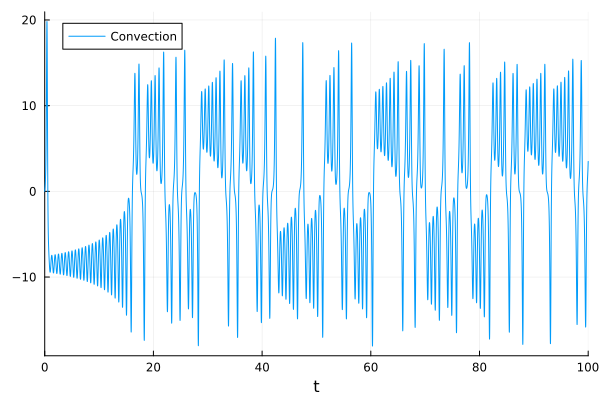

In [50]:
plot(sol,
    idxs=(1),
    labels=["Convection" "horizontal" "Vertical"])

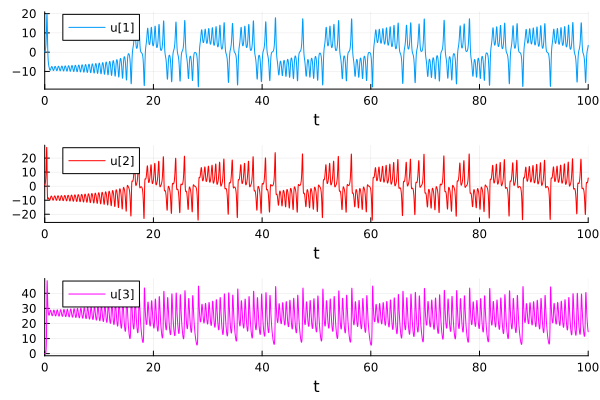

In [67]:
p = plot(sol,idxs=(1),layout=(3,1))
plot!(p,sol,idxs=(2),subplot=2,c=:red)
plot!(p,sol,idxs=(3),subplot=3, c=:magenta)

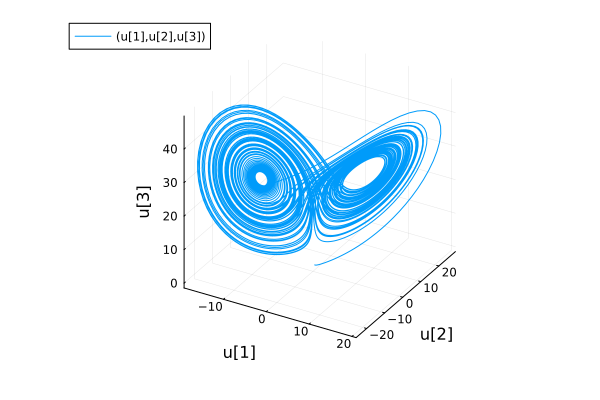

In [71]:
plot(sol,idxs=(1,2,3))